# Video: Testing Document Vectors for Classification

This video will compare different kinds of document vectors to build classifiers using logistic regression.

Script:
* This week we have talked about bags of words, term frequency, and term frequency inverse document frequency.
* In this video, I will show how to use them as features for text classifiers using logistic regression and compare their performance.
* As an example, I will use a dump of ninety seven thousand recipes from my Bacon Powered Recipes site and try to classify the recipes as desserts or not.
* This is not a particularly hard text classification task as vocabulary gives a lot of clues, so I'll be focused on the feature extraction and only look at the fit to the training data.

In [ ]:
import pandas as pd

In [ ]:
recipes = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx704-examples/refs/heads/main/data/recipes.tsv.gz", sep="\t")
recipe_tags = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx704-examples/refs/heads/main/data/recipe-tags.tsv.gz", sep="\t")

Script:
* I already downloaded and loaded data frames with the recipe data and the matching tags.
* Let's take a look.

In [ ]:
recipes

,recipe_slug,recipe_title,recipe_introduction,recipe_ingredients,recipe_instructions,recipe_conclusion,recipe_related_slugs,recipe_ts
0,spiced-pear-and-walnut-salad,Spiced Pear And Walnut Salad,Spiced pear and walnut salad is a delicious an...,"[""2 ripe pears, thinly sliced"", ""4 cups mixed ...","[""In a small bowl, whisk together the olive oi...",\N,"[""pear-and-blue-cheese-salad"", ""walnut-and-cra...",2023-06-17 22:10:35.744536+00
1,roasted-pear-and-butternut-squash-soup,Roasted Pear And Butternut Squash Soup,Roasted pear and butternut squash soup is a cr...,"[""2 medium-sized butternut squash, peeled and ...","[""Preheat the oven to 400°F."", ""In a large bow...",\N,"[""roasted-butternut-squash-and-apple-soup"", ""p...",2023-06-17 22:10:46.428069+00
2,peach-clafoutis,Peach Clafoutis,Peach clafoutis is a classic French dessert th...,"[""4 ripe peaches, peeled and sliced"", ""3 eggs""...","[""Preheat the oven to 375°F."", ""Grease a 9-inc...",\N,"[""cherry-clafoutis"", ""blueberry-clafoutis"", ""a...",2023-06-17 19:05:50.44248+00
3,plum-clafoutis,Plum Clafoutis,Plum clafoutis is a classic French dessert mad...,"[""4-5 ripe plums, pitted and sliced"", ""3 eggs""...","[""Preheat the oven to 375°F (190°C) and butter...",\N,"[""cherry-clafoutis"", ""apple-clafoutis"", ""blueb...",2023-06-17 19:05:42.705122+00
4,pear,Pear,Pears are a sweet and juicy fruit that come in...,"[""1 sheet of puff pastry"", ""2 ripe pears, peel...","[""Preheat the oven to 400°F."", ""Roll out the p...",\N,"[""pear-and-goat-cheese-salad"", ""pear-and-ginge...",2023-06-17 22:11:13.760378+00
...,...,...,...,...,...,...,...,...
97042,pear-coffee-cake,Pear Coffee Cake,Description: \nPear coffee cake is a moist an...,"[""2 cups all-purpose flour"", ""1 cup granulated...","[""Preheat your oven to 350°F (175°C). Grease a...",\N,"[""apple-cinnamon-coffee-cake"", ""banana-nut-bre...",2025-07-16 22:22:02.711138+00
97043,elegant-pear-coffee-loaf,Elegant Pear Coffee Loaf,Description: \nThe Elegant Pear Coffee Loaf i...,"[""2 ripe pears, peeled, cored, and chopped"", ""...","[""Preheat your oven to 350°F (175°C). Grease a...",\N,"[""pear-and-walnut-coffee-cake"", ""coffee-infuse...",2025-07-16 22:22:18.463873+00
97044,halibut,Halibut,"Description: \nHalibut is a large, flat fish ...","[""4 halibut fillets (6 oz each)"", ""Salt and fr...","[""Pat the halibut fillets dry and season gener...",\N,"[""lemon-herb-baked-halibut"", ""grilled-halibut-...",2025-07-17 20:40:05.664215+00
97045,arayes,Arayes,Description: \nArayes are a delicious Middle ...,"[""4 large pita bread pockets"", ""1 pound ground...","[""In a mixing bowl, combine the ground meat, c...",\N,"[""shawarma"", ""kebabs"", ""falafel"", ""manakish-mi...",2025-07-22 21:30:10.41649+00


Script:
* This data is keyed by the recipe_slug column.
* You will see that slug in the URL if you find the same recipe on the site.
* I'll index the recipes with that column now.

In [ ]:
recipes = recipes.set_index("recipe_slug")
recipes

,recipe_title,recipe_introduction,recipe_ingredients,recipe_instructions,recipe_conclusion,recipe_related_slugs,recipe_ts
recipe_slug,,,,,,,
spiced-pear-and-walnut-salad,Spiced Pear And Walnut Salad,Spiced pear and walnut salad is a delicious an...,"[""2 ripe pears, thinly sliced"", ""4 cups mixed ...","[""In a small bowl, whisk together the olive oi...",\N,"[""pear-and-blue-cheese-salad"", ""walnut-and-cra...",2023-06-17 22:10:35.744536+00
roasted-pear-and-butternut-squash-soup,Roasted Pear And Butternut Squash Soup,Roasted pear and butternut squash soup is a cr...,"[""2 medium-sized butternut squash, peeled and ...","[""Preheat the oven to 400°F."", ""In a large bow...",\N,"[""roasted-butternut-squash-and-apple-soup"", ""p...",2023-06-17 22:10:46.428069+00
peach-clafoutis,Peach Clafoutis,Peach clafoutis is a classic French dessert th...,"[""4 ripe peaches, peeled and sliced"", ""3 eggs""...","[""Preheat the oven to 375°F."", ""Grease a 9-inc...",\N,"[""cherry-clafoutis"", ""blueberry-clafoutis"", ""a...",2023-06-17 19:05:50.44248+00
plum-clafoutis,Plum Clafoutis,Plum clafoutis is a classic French dessert mad...,"[""4-5 ripe plums, pitted and sliced"", ""3 eggs""...","[""Preheat the oven to 375°F (190°C) and butter...",\N,"[""cherry-clafoutis"", ""apple-clafoutis"", ""blueb...",2023-06-17 19:05:42.705122+00
pear,Pear,Pears are a sweet and juicy fruit that come in...,"[""1 sheet of puff pastry"", ""2 ripe pears, peel...","[""Preheat the oven to 400°F."", ""Roll out the p...",\N,"[""pear-and-goat-cheese-salad"", ""pear-and-ginge...",2023-06-17 22:11:13.760378+00
...,...,...,...,...,...,...,...
pear-coffee-cake,Pear Coffee Cake,Description: \nPear coffee cake is a moist an...,"[""2 cups all-purpose flour"", ""1 cup granulated...","[""Preheat your oven to 350°F (175°C). Grease a...",\N,"[""apple-cinnamon-coffee-cake"", ""banana-nut-bre...",2025-07-16 22:22:02.711138+00
elegant-pear-coffee-loaf,Elegant Pear Coffee Loaf,Description: \nThe Elegant Pear Coffee Loaf i...,"[""2 ripe pears, peeled, cored, and chopped"", ""...","[""Preheat your oven to 350°F (175°C). Grease a...",\N,"[""pear-and-walnut-coffee-cake"", ""coffee-infuse...",2025-07-16 22:22:18.463873+00
halibut,Halibut,"Description: \nHalibut is a large, flat fish ...","[""4 halibut fillets (6 oz each)"", ""Salt and fr...","[""Pat the halibut fillets dry and season gener...",\N,"[""lemon-herb-baked-halibut"", ""grilled-halibut-...",2025-07-17 20:40:05.664215+00


Script:
* Let's look at the recipe tags.

In [ ]:
recipe_tags

,recipe_slug,recipe_tag
0,spiced-pear-and-walnut-salad,salad
1,spiced-pear-and-walnut-salad,pear
2,spiced-pear-and-walnut-salad,walnut
3,spiced-pear-and-walnut-salad,spiced
4,spiced-pear-and-walnut-salad,healthy
...,...,...
884368,ultimate-chicago-style-deep-dish-pizza,chicagodeepdish
884369,ultimate-chicago-style-deep-dish-pizza,comfortfood
884370,ultimate-chicago-style-deep-dish-pizza,deepdishpizza
884371,ultimate-chicago-style-deep-dish-pizza,familyfavorite


Script:
* Next I will filter out the recipes with the dessert tag and index that list.

In [ ]:
desserts = recipe_tags.query("recipe_tag == 'dessert'").set_index("recipe_slug")
desserts

,recipe_tag
recipe_slug,
pear,dessert
pear-and-gingerbread-trifle,dessert
almond-flour-banana-bread,dessert
almond-flour-chocolate-chip-cookies,dessert
almond-joy-brownies,dessert
...,...
crispy-rice-shortbread-bites,dessert
almond-infused-rice-shortbread-squares,dessert
fragrant-pear-rice-pudding,dessert


Script:
* Next, I will make a target column with all the recipes.

In [ ]:
dessert_target = pd.DataFrame({"dessert": recipes.index.isin(desserts.index)}, index=recipes.index)
dessert_target

,dessert
recipe_slug,
spiced-pear-and-walnut-salad,False
roasted-pear-and-butternut-squash-soup,False
peach-clafoutis,True
plum-clafoutis,True
pear,True
...,...
pear-coffee-cake,False
elegant-pear-coffee-loaf,True
halibut,False


Script:
* We have previously seen boolean columns interfere with our math operations, so let's convert those to integers now.

In [ ]:
dessert_target["dessert"] = dessert_target["dessert"].astype(int)
dessert_target

,dessert
recipe_slug,
spiced-pear-and-walnut-salad,0
roasted-pear-and-butternut-squash-soup,0
peach-clafoutis,1
plum-clafoutis,1
pear,1
...,...
pear-coffee-cake,0
elegant-pear-coffee-loaf,1
halibut,0


Script:
* Let's get started on feature extraction.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Script:
* We previously looked at the Scikit-learn feature extraction module back in Mod 2.

In [ ]:
vectorizer = CountVectorizer()

Script:
* We will use the CountVectorizer object now without setting any options.
* This will setup a column for each different word parsed from the training data, and the values will be the word counts.
* Let's use the recipe introduction column as our source of word features.

In [ ]:
recipes["recipe_introduction"]

,recipe_introduction
recipe_slug,
spiced-pear-and-walnut-salad,Spiced pear and walnut salad is a delicious an...
roasted-pear-and-butternut-squash-soup,Roasted pear and butternut squash soup is a cr...
peach-clafoutis,Peach clafoutis is a classic French dessert th...
plum-clafoutis,Plum clafoutis is a classic French dessert mad...
pear,Pears are a sweet and juicy fruit that come in...
...,...
pear-coffee-cake,Description: \nPear coffee cake is a moist an...
elegant-pear-coffee-loaf,Description: \nThe Elegant Pear Coffee Loaf i...
halibut,"Description: \nHalibut is a large, flat fish ..."


In [ ]:
X_bow = vectorizer.fit_transform(recipes["recipe_introduction"])
X_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5533341 stored elements and shape (97047, 7918)>

Script:
* This vectorizer object returns the features in a sparse matrix object.
* It found almost 8000 different words in the recipe introductions, so multiplied by the 97000 recipes, that would be almost 770 million numbers.
* The sparse representation only stored 5.5 million numbers which is a lot smaller.
* Let's take a peek at the features for the first recipe.

In [ ]:
[(i, v) for (i, v) in enumerate(X_bow[0].todense().tolist()[0]) if v]

[(264, 7),
 (286, 1),
 (329, 1),
 (1379, 1),
 (1486, 1),
 (1785, 1),
 (1938, 1),
 (2137, 1),
 (2630, 1),
 (2699, 1),
 (3054, 1),
 (3220, 1),
 (3326, 1),
 (3576, 3),
 (4188, 1),
 (4515, 1),
 (4886, 1),
 (4915, 1),
 (4926, 3),
 (4935, 1),
 (4945, 1),
 (5202, 1),
 (5205, 2),
 (5246, 1),
 (5809, 1),
 (5919, 1),
 (6088, 3),
 (6496, 1),
 (6690, 1),
 (6691, 1),
 (6983, 1),
 (7166, 2),
 (7168, 5),
 (7193, 1),
 (7257, 1),
 (7313, 1),
 (7653, 1),
 (7654, 2),
 (7666, 1),
 (7769, 3)]

Script:
* The first number in each pair indicates a features, and the second number indicates its count.
* But what are those features?
* What are all those numbers?

In [ ]:
vectorizer.get_feature_names_out()

array(['10', '12', '14', ..., 'çorbası', 'éclairs', 'đá'], dtype=object)

Script:
* That array has all the different words used for features.

In [ ]:
[(vectorizer.get_feature_names_out()[i], v) for (i, v) in enumerate(X_bow[0].todense().tolist()[0]) if v]

[('and', 7),
 ('any', 1),
 ('are', 1),
 ('cinnamon', 1),
 ('combines', 1),
 ('crunchiness', 1),
 ('delicious', 1),
 ('dressing', 1),
 ('flavorful', 1),
 ('for', 1),
 ('greens', 1),
 ('healthy', 1),
 ('honey', 1),
 ('is', 3),
 ('made', 1),
 ('mixed', 1),
 ('nutmeg', 1),
 ('occasion', 1),
 ('of', 3),
 ('oil', 1),
 ('olive', 1),
 ('pear', 1),
 ('pears', 2),
 ('perfect', 1),
 ('refreshing', 1),
 ('result', 1),
 ('salad', 3),
 ('sliced', 1),
 ('spiced', 1),
 ('spices', 1),
 ('sweetness', 1),
 ('that', 2),
 ('the', 5),
 ('thinly', 1),
 ('toasted', 1),
 ('tossed', 1),
 ('walnut', 1),
 ('walnuts', 2),
 ('warmth', 1),
 ('with', 3)]

Script:
* What recipe is this?
* It sounds like a salad with nuts.

In [ ]:
recipes.iloc[0]

,spiced-pear-and-walnut-salad
recipe_title,Spiced Pear And Walnut Salad
recipe_introduction,Spiced pear and walnut salad is a delicious an...
recipe_ingredients,"[""2 ripe pears, thinly sliced"", ""4 cups mixed ..."
recipe_instructions,"[""In a small bowl, whisk together the olive oi..."
recipe_conclusion,\N
recipe_related_slugs,"[""pear-and-blue-cheese-salad"", ""walnut-and-cra..."
recipe_ts,2023-06-17 22:10:35.744536+00


Script:
* Let's look a bit more at these features.

In [ ]:
import random

In [ ]:
random.sample(vectorizer.get_feature_names_out().tolist(), 10)

['glaze',
 'dakkochi',
 'crawfish',
 'toss',
 'bustling',
 'crusts',
 'enveloping',
 'firm',
 'cling',
 'ranch']

Script:
* There's a lot of variety in those words.
* Will a logistic regression make sense of them?

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
bow_model = LogisticRegression()
bow_model.fit(X_bow, dessert_target["dessert"])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Script:
* The logistic regression had a bit of a tough time fitting.
* Perhaps it would do better with more time to iterate.
* Let's see how it did.

In [ ]:
bow_predictions = bow_model.predict(X_bow)
(bow_predictions == dessert_target["dessert"]).mean()

np.float64(0.9645635619854297)

Script:
* 96% accuracy sounds good, but let's check how many recipes are desserts first.

In [ ]:
dessert_target["dessert"].mean()

np.float64(0.09875627273383)

Script:
* Fewer than 10% of the recipes are labeled as desserts, so we could get 90% accuracy just by always predicting no.
* But the regression did fit significantly better than that.
* Let's take a closer look at the probabilities.

In [ ]:
import matplotlib.pyplot as plt

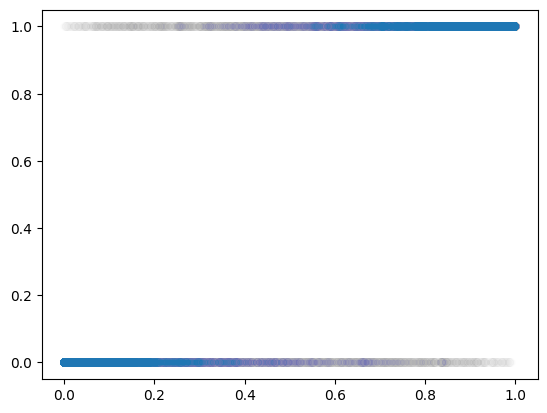

In [ ]:
bow_probabilities = bow_model.predict_proba(X_bow)[:,1]
plt.scatter(bow_probabilities, dessert_target["dessert"], alpha=0.005);

Script:
* From this plot, you can see that there is pretty good alignment between the predicted probabilities and the ground truth.
* There are some recipes where it confidently gives the wrong answer.
* Those would be the recipes that ended up in the top left where they said the probability of being a dessert was about zero, but the recipe was a dessert, or the bottom right where the opposite was the case.

Script:
* Let's move on to term frequencies.
* The columns here will be the same, but we will divide by the number of words in each recipe.

In [ ]:
X_tf = X_bow / (X_bow.sum(axis=1) + 1)

Script:
* The plus one in there is a hack to cover a few edge cases where a recipe had no words counted.
* Think of it as a light additive smoothing to handle bad data.
* Now let's fit a new logistic regression.

In [ ]:
tf_model = LogisticRegression()
tf_model.fit(X_tf, dessert_target["dessert"])

LogisticRegression()

Script:
* This time, there wasn't any problem getting convergence.

In [ ]:
tf_predictions = tf_model.predict(X_tf)
(tf_predictions == dessert_target["dessert"]).mean()

np.float64(0.9343513967459066)

Script:
* However, the accuracy here was not nearly as good.

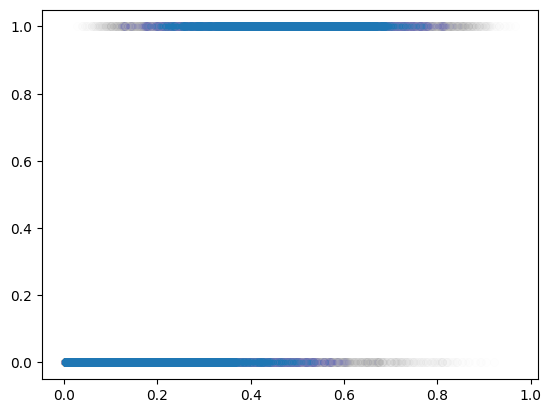

In [ ]:
tf_probabilities = tf_model.predict_proba(X_tf)[:,1]
plt.scatter(tf_probabilities, dessert_target["dessert"], alpha=0.005);

Script:
* If we plot the probabilities here, then the highest predictions are about 26%.
* So this model was not confident that any of the recipes were desserts and ended up predicting not a dessert for everything.
* Why did that happen?
* Bag of words worked well because we just notice a keyword to flag a recipe as a dessert.
* In comparison, the term frequency version will want a higher percentage of relevant words rather than being satisfied individual words in large documents.


Script:
* If we were to look at term frequency inverse document frequency, we would take the term frequency features and divide each column by the inverse document features.
* That ends up being a constant scaling of each column, so that does not change what the linear component of the logistic regression can represent.
* So we'd get the same results as term frequency features.


Script: (faculty on screen)
* We just saw bag of words do well when individual mentions can establish the classification.
* Term frequency was weaker for this classification, but we'd expect it to be stronger when we want to see a theme to be pervasive in the document.
* We deferred term frequency inverse document frequency as it would give the same results in this case.
* What will be the best for your problem?
* You may need to try both ways, but you can think about whether individual mentions of a subject suffice as a clue.